In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline

In [ ]:
df = pd.read_csv('data/druguse.tsv', sep='\t')

In [ ]:
df.head()

In [5]:
#For a group of featurs, calculate the depression precent of consumers and non comsumers of a drug
def dep_precent(df, target):
    consumers = []
    non_consumers = []
    for col in df.columns:
        frames = [df[[col]], target]
        ever_used = pd.concat(frames, axis=1, sort=False)
        grouped = ever_used.groupby([col, 'AMDELT']).size().reset_index(name='count')
        non_consumer = grouped.iloc[0,2] / (grouped.iloc[0,2] + grouped.iloc[1,2])
        consumer = grouped.iloc[2,2] / (grouped.iloc[2,2] + grouped.iloc[3,2])
        non_consumers.append(non_consumer)
        consumers.append(consumer)
    return consumers, non_consumers    

In [26]:
#Features for "have you have used a drug"
target = df[['AMDELT']]
target = target[target.AMDELT > 0]
ever_used = df[['CIGFLAG', 'CGRFLAG', 'SNFFLAG', 'ALCFLAG', 'MRJFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG','HALFLAG','INHFLAG', 'ANLFLAG', 'TRQFLAG', 'STMFLAG', 'SEDFLAG']]
consumers, non_consumers = dep_precent(ever_used, target)

In [27]:
#Drug frequency
frames = [df[['IRCIGFM']], target]
freq_used = pd.concat(frames, axis=1, sort=False)
freq_used = freq_used.dropna()
freq_group = freq_used.groupby(['IRCIGFM', 'AMDELT']).size().reset_index(name='count')

In [29]:
has_dep = freq_group[freq_group.AMDELT == 1.0]
no_dep = freq_group[freq_group.AMDELT == 2.0]

In [31]:
dep_less_than_15 = has_dep.loc[has_dep.IRCIGFM < 15]
dep_less_than_15 = dep_less_than_15['count'].sum()
no_dep_less_than_15 = no_dep.loc[no_dep.IRCIGFM < 15]
no_dep_less_than_15 = no_dep_less_than_15['count'].sum()

In [34]:
dep_between_15_to_30 = has_dep.loc[(has_dep.IRCIGFM > 14) & (has_dep.IRCIGFM < 31)]
dep_between_15_to_30 = dep_between_15_to_30['count'].sum()
no_dep_between_15_to_30 = no_dep.loc[(no_dep.IRCIGFM > 14) & (no_dep.IRCIGFM < 31)]
no_dep_between_15_to_30 = no_dep_between_15_to_30['count'].sum()

In [32]:
dep_less_than_15

519

In [33]:
no_dep_less_than_15

2537

In [35]:
no_dep_between_15_to_30

6552

In [36]:
dep_between_15_to_30

1564

In [44]:
dep_less_than_11 = has_dep.loc[has_dep.IRCIGFM < 11]
dep_less_than_11 = dep_less_than_11['count'].sum()
no_dep_less_than_11 = no_dep.loc[no_dep.IRCIGFM < 11]
no_dep_less_than_11 = no_dep_less_than_11['count'].sum()

In [45]:
dep_less_than_11

489

In [46]:
no_dep_less_than_11

2369

In [47]:
dep_between_11_to_30 = has_dep.loc[(has_dep.IRCIGFM > 10) & (has_dep.IRCIGFM < 31)]
dep_between_11_to_30 = dep_between_11_to_30['count'].sum()
no_dep_between_11_to_30 = no_dep.loc[(no_dep.IRCIGFM > 10) & (no_dep.IRCIGFM < 31)]
no_dep_between_11_to_30 = no_dep_between_11_to_30['count'].sum()

In [48]:
dep_between_11_to_30

1592

In [49]:
no_dep_between_11_to_30

6710

In [17]:

grouped = df.groupby(['ALCFLAG', 'AMDELT'])

In [18]:
grouped.size()

ALCFLAG  AMDELT
0        -9        11644
          1          421
          2         4435
1        -9         6033
          1         5165
          2        27570
dtype: int64

In [19]:
ever_used2 = df[['CIGFLAG', 'CGRFLAG', 'SNFFLAG', 'ALCFLAG', 'MRJFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG','HALFLAG','INHFLAG', 'ANLFLAG', 'TRQFLAG', 'STMFLAG', 'SEDFLAG', 'AMDELT']]

In [ ]:
ever_used2.corr()

In [ ]:
freq_used.corr()

In [50]:
n_groups = len(consumers)
bar_width = 0.35
opacity = 0.8

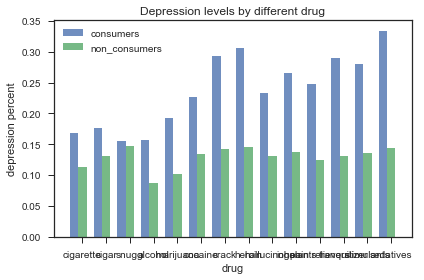

In [51]:
fig, ax = plt.subplots()

index = np.arange(n_groups)
rects1 = plt.bar(index, consumers, bar_width,
                 alpha=opacity,
                 color='b',
                 label='consumers')
 
rects2 = plt.bar(index + bar_width, non_consumers, bar_width,
                 alpha=opacity,
                 color='g',
                 label='non_consumers')
plt.xlabel('drug')
plt.ylabel('depression percent')
plt.title('Depression levels by different drug')
plt.xticks(index + bar_width, ('cigarette', 'cigar', 'snugg', 'alcohol',
                               'marijuana', 'cocaine', 'crack', 'heroin',
                               'hallucinogen', 'inhalants', 
                               'pain relievers', 'tranquilizer', 
                               'stimulants','sedatives'))
plt.legend()
 
plt.tight_layout() 

Text(0.5,1,'Depression difference')

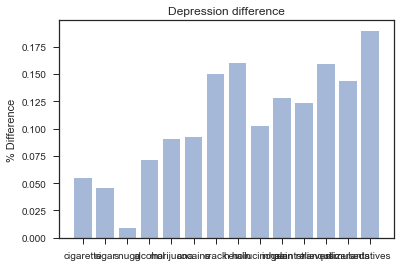

In [52]:
diff = [c - n for c, n in zip(consumers,non_consumers)]
objects = ('cigarette', 'cigar', 'snugg', 'alcohol',
           'marijuana', 'cocaine', 'crack', 'heroin',
           'hallucinogen', 'inhalants', 
           'pain relievers', 'tranquilizer', 
           'stimulants','sedatives')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, diff, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% Difference')
plt.title('Depression difference')

Drug and alcohol abuse vs depression

In [3]:
X = pd.read_pickle('feature_df.pkl')
y = pd.read_pickle('target.pkl')

In [4]:
illicit_or_alc_abuse = X[['ABODILAL']]

In [7]:
target = y.to_frame()
target

,AMDEYR
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,0
10,0


In [54]:
drug_abuse = pd.concat([illicit_or_alc_abuse, target], axis=1, sort=False)
grouped = drug_abuse.groupby(['ABODILAL', 'AMDEYR']).size().reset_index(name='count')
non_abused = grouped.iloc[1,2] / (grouped.iloc[0,2] + grouped.iloc[1,2])
abused = grouped.iloc[3,2] / (grouped.iloc[2,2] + grouped.iloc[3,2])

In [55]:
abuseds

[0.16945107398568018]

In [56]:
abused

0.16945107398568018

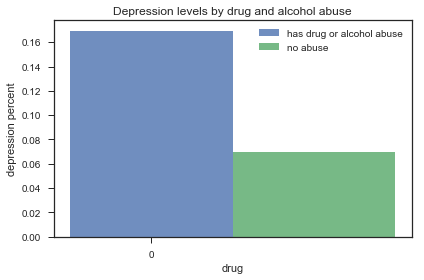

In [57]:

bar_width = 0.05
opacity = 0.8
fig, ax = plt.subplots()

index = np.arange(1)
rects1 = plt.bar(index, abused, bar_width,
                 alpha=opacity,
                 color='b',
                 label='has drug or alcohol abuse')
 
rects2 = plt.bar(index + bar_width, non_abused, bar_width,
                 alpha=opacity,
                 color='g',
                 label='no abuse')
plt.xlabel('drug')
plt.ylabel('depression percent')
plt.title('Depression levels by drug and alcohol abuse')
plt.xticks(index)
plt.legend()
 
plt.tight_layout() 

Alcohol frequency in the past year

In [39]:
df = pd.read_pickle('df.pkl')

In [106]:
alc_freq = df[['ALCYDAYS']]

In [107]:
#create dataframe with depression and alcohol frequency
alc_freq = pd.concat([alc_freq, target], axis=1, sort=False)

#Remove NaN
alc_freq = alc_freq.dropna()

grouped = alc_freq.groupby(['ALCYDAYS', 'AMDEYR']).size().reset_index(name='count')

In [100]:
grouped

,ALCYDAYS,AMDEYR,count
0,1,0.0,5369
1,1,1.0,590
2,2,0.0,7091
3,2,1.0,666
4,3,0.0,4376
5,3,1.0,388
6,4,0.0,7751
7,4,1.0,720
8,5,0.0,1062
9,5,1.0,91


In [81]:
deps = []
no_deps = []

for l in range(1, 12, 2):
    dep = grouped.iloc[l,2] / (grouped.iloc[l,2] + grouped.iloc[l-1,2]) 
    deps.append(dep)
for l in range(0, 11, 2):
    no_dep = grouped.iloc[l,2] / (grouped.iloc[l+1,2] + grouped.iloc[l,2])  
    no_deps.append(no_dep)

bar_width = 0.35
opacity = 0.8
fig, ax = plt.subplots()

index = np.arange(6)
rects1 = plt.bar(index, deps, bar_width,
                 alpha=opacity,
                 color='b',
                 label='has drug or alcohol abuse')
 
rects2 = plt.bar(index + bar_width, no_deps, bar_width,
                 alpha=opacity,
                 color='g',
                 label='no abuse')
plt.xlabel('drug')
plt.ylabel('depression percent')
plt.title('Depression levels by drug and alcohol abuse')
plt.xticks(index + bar_width, ('1-11', '12-49', '50-99', '100-299',
                               '300-365', 'Non user or no past year use'))
plt.legend()
 
plt.tight_layout() 

In [83]:
deps

[0.09900990099009901,
 0.0858579347685961,
 0.08144416456759027,
 0.0849958682564042,
 0.07892454466608846,
 0.0695753468177486]

In [84]:
no_deps

[0.900990099009901,
 0.9141420652314038,
 0.9185558354324097,
 0.9150041317435958,
 0.9210754553339116,
 0.9304246531822514]

Alcohol age of first use vs depression

In [213]:
alc_age = df[['IRALCAGE']]

#create dataframe with depression and alcohol age
alc_age = pd.concat([alc_age, target], axis=1, sort=False)

#Remove NaN
alc_age = alc_age.dropna()

grouped = alc_age.groupby(['IRALCAGE', 'AMDEYR']).size().reset_index(name='count')

In [214]:
has_dep = grouped[grouped.AMDEYR == 1.0]
no_dep = grouped[grouped.AMDEYR == 0.0]

In [215]:
dep_1_17 = has_dep.loc[has_dep.IRALCAGE < 18]
dep_1_17 = dep_1_17['count'].sum()

dep_18_25 = has_dep.loc[(has_dep.IRALCAGE > 17) & (has_dep.IRALCAGE < 26)]
dep_18_25 = dep_18_25['count'].sum()

dep_26_34 = has_dep.loc[(has_dep.IRALCAGE > 25) & (has_dep.IRALCAGE < 35)]
dep_26_34 = dep_26_34['count'].sum()

dep_35_49 = has_dep.loc[(has_dep.IRALCAGE > 34) & (has_dep.IRALCAGE < 50)]
dep_35_49 = dep_35_49['count'].sum()

dep_50_68 = has_dep.loc[has_dep.IRALCAGE > 49]
dep_50_68 = dep_50_68['count'].sum()

dep_never_used = has_dep.loc[has_dep.IRALCAGE == 991]
dep_never_used = dep_never_used['count'].sum()

In [216]:
no_dep_1_17 = no_dep.loc[no_dep.IRALCAGE < 18]
no_dep_1_17 = no_dep_1_17['count'].sum()

no_dep_18_25 = no_dep.loc[(no_dep.IRALCAGE > 17) & (no_dep.IRALCAGE < 26)]
no_dep_18_25 = no_dep_18_25['count'].sum()

no_dep_26_34 = no_dep.loc[(no_dep.IRALCAGE > 25) & (no_dep.IRALCAGE < 35)]
no_dep_26_34 = no_dep_26_34['count'].sum()

no_dep_35_49 = no_dep.loc[(no_dep.IRALCAGE > 34) & (no_dep.IRALCAGE < 50)]
no_dep_35_49 = no_dep_35_49['count'].sum()

no_dep_50_68 = no_dep.loc[no_dep.IRALCAGE > 49]
no_dep_50_68 = no_dep_50_68['count'].sum()

no_dep_never_used = no_dep.loc[no_dep.IRALCAGE == 991]
no_dep_never_used = no_dep_never_used['count'].sum()

In [217]:
alc_dep_rates = []

In [218]:
dep_1_17_percent = dep_1_17 / (dep_1_17 + no_dep_1_17)
alc_dep_rates.append(dep_1_17_percent)

In [219]:
dep_18_25_percent = dep_18_25 / (dep_18_25 + no_dep_18_25)
alc_dep_rates.append(dep_18_25_percent)

In [220]:
dep_26_34_percent = dep_26_34 / (dep_26_34 + no_dep_26_34)
alc_dep_rates.append(dep_26_34_percent)

In [221]:
dep_35_49_percent = dep_35_49 / (dep_35_49 + no_dep_35_49)
alc_dep_rates.append(dep_35_49_percent)

In [222]:
dep_50_68_percent = dep_50_68 / (dep_50_68 + no_dep_50_68)
alc_dep_rates.append(dep_50_68_percent)

In [223]:
dep_never_used_percent = dep_never_used / (dep_never_used + no_dep_never_used)
alc_dep_rates.append(dep_never_used_percent)

In [224]:
alc_dep_rates

[0.0981914733730775,
 0.0694387713422106,
 0.05198776758409786,
 0.087248322147651,
 0.05586362702813719,
 0.056070913213770356]

<Figure size 648x288 with 0 Axes>

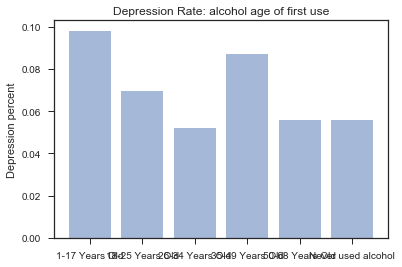

<Figure size 648x288 with 0 Axes>

In [237]:
objects = ('1-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old',
           '50-68 Years Old', 'Never used alcohol')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, alc_dep_rates, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Depression percent')
plt.title('Depression Rate: alcohol age of first use')

fig = plt.figure(figsize=(9,4))
fig = plt.gcf()
fig

Cigarette age of first use vs depression

In [189]:
cig_age = df[['IRCIGAGE']]

#create dataframe with depression and alcohol age
cig_age = pd.concat([cig_age, target], axis=1, sort=False)

#Remove NaN
cig_age = cig_age.dropna()

grouped = cig_age.groupby(['IRCIGAGE', 'AMDEYR']).size().reset_index(name='count')

In [190]:
has_dep = grouped[grouped.AMDEYR == 1.0]
no_dep = grouped[grouped.AMDEYR == 0.0]

In [191]:
dep_1_17 = has_dep.loc[has_dep.IRCIGAGE < 18]
dep_1_17 = dep_1_17['count'].sum()

dep_18_25 = has_dep.loc[(has_dep.IRCIGAGE > 17) & (has_dep.IRCIGAGE < 26)]
dep_18_25 = dep_18_25['count'].sum()

dep_26_34 = has_dep.loc[(has_dep.IRCIGAGE > 25) & (has_dep.IRCIGAGE < 35)]
dep_26_34 = dep_26_34['count'].sum()

dep_35_49 = has_dep.loc[(has_dep.IRCIGAGE > 34) & (has_dep.IRCIGAGE < 50)]
dep_35_49 = dep_35_49['count'].sum()

dep_50_68 = has_dep.loc[has_dep.IRCIGAGE > 49]
dep_50_68 = dep_50_68['count'].sum()

dep_never_used = has_dep.loc[has_dep.IRCIGAGE == 991]
dep_never_used = dep_never_used['count'].sum()

In [192]:
no_dep_1_17 = no_dep.loc[no_dep.IRCIGAGE < 18]
no_dep_1_17 = no_dep_1_17['count'].sum()

no_dep_18_25 = no_dep.loc[(no_dep.IRCIGAGE > 17) & (no_dep.IRCIGAGE < 26)]
no_dep_18_25 = no_dep_18_25['count'].sum()

no_dep_26_34 = no_dep.loc[(no_dep.IRCIGAGE > 25) & (no_dep.IRCIGAGE < 35)]
no_dep_26_34 = no_dep_26_34['count'].sum()

no_dep_35_49 = no_dep.loc[(no_dep.IRCIGAGE > 34) & (no_dep.IRCIGAGE < 50)]
no_dep_35_49 = no_dep_35_49['count'].sum()

no_dep_50_68 = no_dep.loc[no_dep.IRCIGAGE > 49]
no_dep_50_68 = no_dep_50_68['count'].sum()

no_dep_never_used = no_dep.loc[no_dep.IRCIGAGE == 991]
no_dep_never_used = no_dep_never_used['count'].sum()

In [202]:
cig_dep_rates = []

In [203]:
dep_1_17_percent = dep_1_17 / (dep_1_17 + no_dep_1_17)
cig_dep_rates.append(dep_1_17_percent)

In [204]:
dep_18_25_percent = dep_18_25 / (dep_18_25 + no_dep_18_25)
cig_dep_rates.append(dep_18_25_percent)

In [205]:
dep_26_34_percent = dep_26_34 / (dep_26_34 + no_dep_26_34)
cig_dep_rates.append(dep_26_34_percent)

In [206]:
dep_35_49_percent = dep_35_49 / (dep_35_49 + no_dep_35_49)
cig_dep_rates.append(dep_35_49_percent)

In [207]:
dep_50_68_percent = dep_50_68 / (dep_50_68 + no_dep_50_68)
cig_dep_rates.append(dep_50_68_percent)

In [208]:
dep_never_used_percent = dep_never_used / (dep_never_used + no_dep_never_used)
cig_dep_rates.append(dep_never_used_percent)

In [209]:
cig_dep_rates

[0.09866589327146172,
 0.07858603564125037,
 0.10989010989010989,
 0.13793103448275862,
 0.06343027249828258,
 0.06323506949747976]

Text(0.5,1,'Depression Rate: cigarette age of first use')

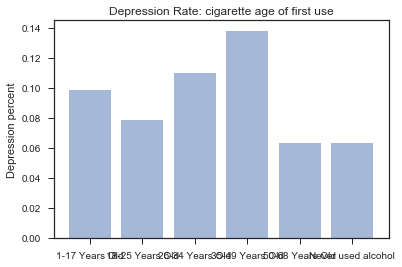

In [210]:
objects = ('1-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old',
           '50-68 Years Old', 'Never used alcohol')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, cig_dep_rates, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Depression percent')
plt.title('Depression Rate: cigarette age of first use')